<a href="https://colab.research.google.com/github/hariomshahu/image-processing/blob/main/HistogramEqualization_and_CLAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Histogram equalization is a technique used in image processing to improve contrast by adjusting the distribution of pixel intensities in an image. It works by stretching the range of intensity values so that they cover the full available dynamic range, thereby enhancing the overall contrast.
2.  traditional histogram equalization can sometimes lead to undesirable effects, such as **amplifying noise** and **over-enhancing local details**, especially in images with **uneven lighting conditions** or **sharp intensity transitions**.
3. Contrast Limited Adaptive Histogram Equalization (CLAHE) is a variation of histogram equalization that addresses these issues by **limiting the amplification of contrast in regions with high local contrast**. It divides the image into small tiles and applies histogram equalization separately to each tile, ensuring that the contrast enhancement is limited within each local area. This helps to avoid over-enhancement of noise and maintains a more natural appearance in the processed image.
4. CLAHE deals with the boundaries of tiles by incorporating a mechanism to avoid abrupt transitions in contrast at tile borders. This is achieved through interpolation techniques.
When applying CLAHE to an image, each tile undergoes histogram equalization independently. However, to avoid abrupt changes in contrast at tile borders, CLAHE blends the histograms of adjacent tiles using interpolation methods. This ensures a smoother transition between neighboring tiles, preventing visible artifacts at the boundaries.                          By seamlessly blending the histograms across tile borders, CLAHE maintains the continuity of contrast enhancement throughout the image, resulting in a more natural and visually appealing result.












In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
from skimage import io
from matplotlib import pyplot as plt

In [10]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/image_processing_sample_data/diabetic_retinopathy_1.jpeg",1)
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
luminance, a, b = cv2.split(lab_image)

In [11]:
#plt.hist(luminance.flat, bins=100, range=(0,255))

In [14]:
equalized_luminance_image = cv2.equalizeHist(luminance)
#plt.hist(equalized_image.flat, bins=100, range=(0,255))
equalized_lab_image_1 = cv2.merge((equalized_luminance_image,a,b))
equalized_image_1 = cv2.cvtColor(equalized_lab_image_1, cv2.COLOR_LAB2BGR)

In [23]:
clahe = cv2.createCLAHE(clipLimit=3.0)
clahe_luminance_image_1 = clahe.apply(luminance)
clahe_lab_image_1 = cv2.merge((clahe_luminance_image_1, a, b))
clahe_image_1 = cv2.cvtColor(clahe_lab_image_1, cv2.COLOR_LAB2BGR)

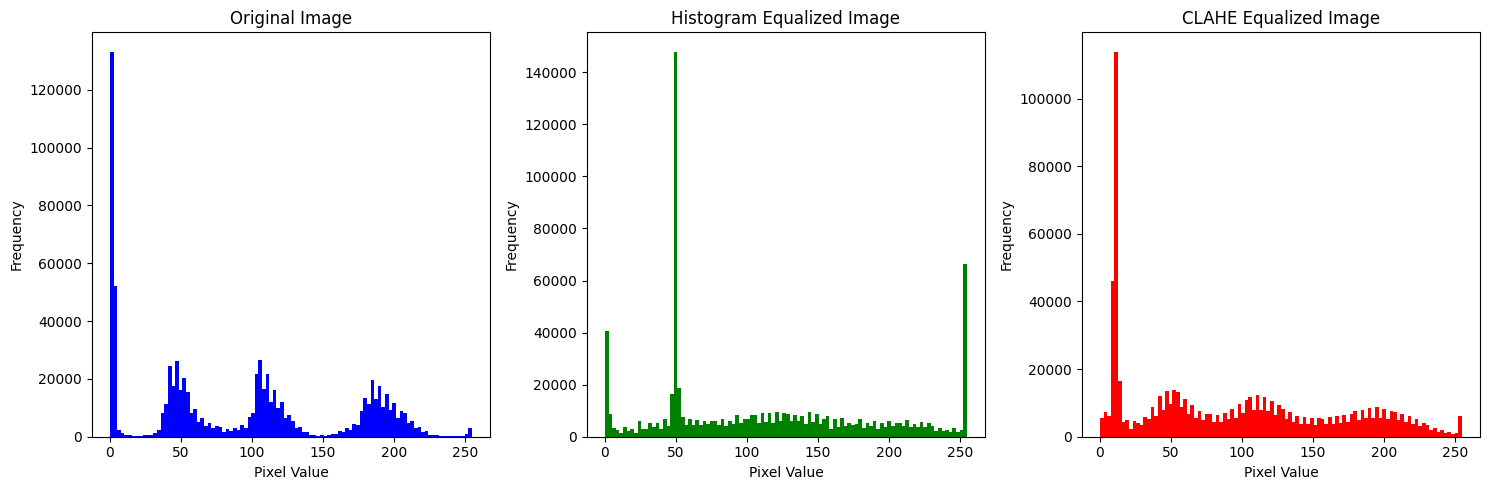

In [24]:
import matplotlib.pyplot as plt

# Assuming luminance, equalized_image, and clahe_equalized_image are your image arrays

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1x3 grid of subplots

axs[0].hist(img.flat, bins=100, range=(0, 255), color='blue')
axs[0].set_title('Original Image')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(equalized_image_1.flat, bins=100, range=(0, 255), color='green')
axs[1].set_title('Histogram Equalized Image')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(clahe_image_1.flat, bins=100, range=(0, 255), color='red')
axs[2].set_title('CLAHE Equalized Image')
axs[2].set_xlabel('Pixel Value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


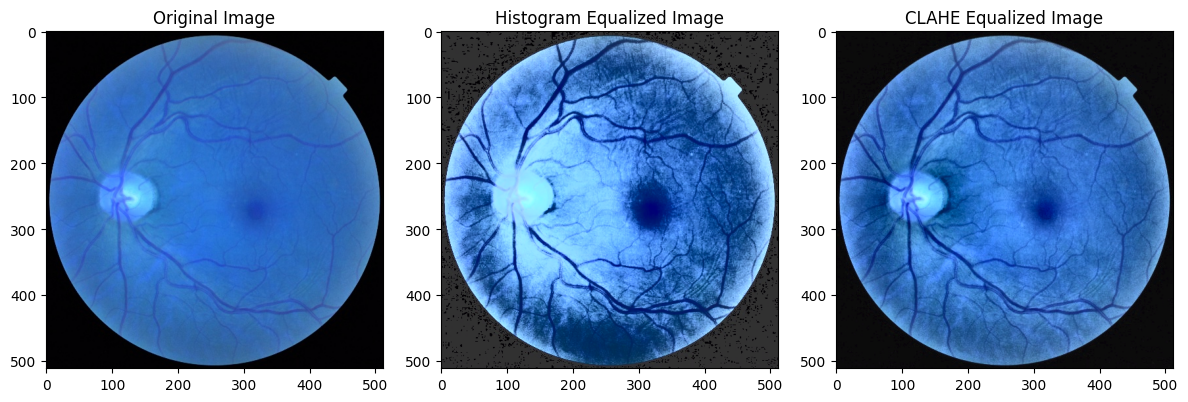

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Create a 1x3 grid of subplots

axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(equalized_image_1)
axs[1].set_title('Histogram Equalized Image')

axs[2].imshow(clahe_image_1)
axs[2].set_title('CLAHE Equalized Image')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
